In [75]:
import os
import re

max_run_id = 0

dir_names = os.listdir("../results/vary-ntrees")
for name in dir_names:
    x = re.match("run-(\d{3})", name)
    if x is not None:
        found_run_id = int(x.group(1))
        if found_run_id > max_run_id:
            max_run_id = found_run_id
run_id = max_run_id + 1

print(run_id)


2


In [76]:
dir_path="../results/vary-ntrees"
run_dir = "run-{:03d}".format(run_id)

run_path = os.path.join(os.path.abspath(dir_path), run_dir)
print(run_path)

c:\Users\Peter\Documents\Peter\9-Graduate-School\dsrg\explainable-ad\code\HEEAD\results\vary-ntrees\run-002


In [1]:
ntrees = 5

for i in range(ntrees):
    for k in range(i+1, ntrees):
        print(i, k)

0 1
0 2
0 3
0 4
1 2
1 3
1 4
2 3
2 4
3 4


In [3]:
import numpy as np
a = np.array([-1, -1, -1, 1, 1, 1])
b = np.array([1, 1, -1, 1, 1, -1])

(a == b) * 1

array([0, 0, 1, 1, 1, 0])

In [14]:
import numpy as np
y1 = np.array([1, 1, 1, 0, 0, 1])
y2 = np.array([0, 1, 1, 1, 0, 1])

np.logical_and((y1 == 1), (y2 == 1)).sum()

3

In [15]:
labels = np.array([-1, -1, 1, 1])

preds1 = np.array([-1, -1, -1, 1])
preds2 = np.array([-1, -1, -1, 1])

# y_i,j=1 iff detector i correctly recognizes sample j, 0 otherwise
y1 = (preds1 == labels) * 1
y2 = (preds2 == labels) * 1

print("y1:", y1)
print("y2:", y2)

# Where N^ab is the number of elements where yi=a and yk=b
n11 = np.logical_and((y1 == 1), (y2 == 1)).sum()
n00 = np.logical_and((y1 == 0), (y2 == 0)).sum()
n01 = np.logical_and((y1 == 0), (y2 == 1)).sum()
n10 = np.logical_and((y1 == 1), (y2 == 0)).sum()

print("n11:", n11)
print("n00:", n00)
print("n01:", n01)
print("n10:", n10)

Qik = ((n11 * n00) - (n01 * n10)) / ((n11*n00) + (n01 * n10))
print("Qik:", Qik)

y1: [1 1 0 1]
y2: [1 1 0 1]
n11: 3
n00: 1
n01: 0
n10: 0
Qik: 1.0


In [19]:
import numpy as np

f1 = np.array([0, 0.1, 0.2, 0, 0.2])
f2 = np.array([0.1, 0, 0.2, 0, 0.2])

a_intersect_b = np.logical_and((f1 > 0), (f2 > 0)).sum()
a_union_b = np.logical_or((f1 > 0), (f2 > 0)).sum()

Jik = a_intersect_b / a_union_b
print(Jik)

0.5


In [20]:
m11 = np.logical_and(f1 > 0, f2 > 0).sum()
m01 = np.logical_and(f1 == 0, f2 > 0).sum()
m10 = np.logical_and(f1 > 0, f2 == 0).sum()

Jik = m11 / (m01 + m10 + m11)
print(Jik)

0.5


In [1]:
a = [False] * 10
print(a)

[False, False, False, False, False, False, False, False, False, False]


In [28]:
import numpy as np
a = np.array([0, 0, 0, 0, 0, 0])
print(np.argwhere(a==1).squeeze())

[]


In [14]:
components = []
a = [1, 2, 3]
b = [4, 5, 6]
components.append(a)
components.append(b)
print(components)

[[1, 2, 3], [4, 5, 6]]


In [46]:
adjacnecy = np.array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.],
 [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
 [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
 [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.],
 [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.],
 [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.],
 [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.],
 [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.]])

In [39]:
adjacnecy = np.array([[0, 1, 0],
              [1, 0, 0],
              [0, 0, 0]])

In [47]:
import networkx as nx
G = nx.Graph(adjacnecy)

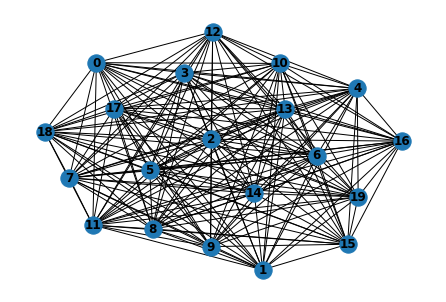

In [48]:
nx.draw(G, with_labels=True, font_weight='bold')

In [49]:
from networkx.algorithms.approximation import clique
clique.max_clique(G)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 14, 18}

In [ ]:
# def __graph_walk(self, i, adjacency, is_visited, nodes_in_component):
#     '''
#     performs a depth first walk of the given graph
#     '''
#     is_visited[i] = True
#     nodes_in_component.append(i)

#     neighbor_idx = np.argwhere(adjacency[i] == 1).T[0]
#     for j in range(len(neighbor_idx)):
#         if not is_visited[neighbor_idx[j]]:
#             self.__graph_walk(neighbor_idx[j], adjacency, is_visited, nodes_in_component)


# enumerate the components (sets of connected nodes) in the graph using the adjacency matrix
# all_components = []  # a list of components
# is_visited = [False] * ntrees
# for i in range(ntrees):
#     if not is_visited[i]:
#         nodes_in_component = []  # a list of node ids which are in the current component
#         # walk the graph to determine the nodes in the component
#         self.__graph_walk(i, adjacency, is_visited, nodes_in_component)
#         # save the component node list
#         all_components.append(nodes_in_component)

In [5]:
test = {1, 2, 3, 4, 5}
print(len(test))
for a in test:
    print(a)

5
1
2
3
4
5


In [10]:
import numpy as np
matrix = np.empty(shape=(10,10))

value = 0
for i in range(10):
    for j in range(10):
        matrix[i][j] = value
        value += 1 

print(matrix)

print(matrix[list(test)])

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
 [50. 51. 52. 53. 54. 55. 56. 57. 58. 59.]
 [60. 61. 62. 63. 64. 65. 66. 67. 68. 69.]
 [70. 71. 72. 73. 74. 75. 76. 77. 78. 79.]
 [80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
 [90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]
[[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
 [50. 51. 52. 53. 54. 55. 56. 57. 58. 59.]]


In [20]:
test = np.array([0, 0, 0.2, 0.4, 0.6, 0])
nz = np.argwhere(test > 0).T[0]
print(nz)
print(test[nz])

[2 3 4]
[0.2 0.4 0.6]


In [23]:
a = np.array([5, 6, 7])
matrix[:,a]

array([[ 5.,  6.,  7.],
       [15., 16., 17.],
       [25., 26., 27.],
       [35., 36., 37.],
       [45., 46., 47.],
       [55., 56., 57.],
       [65., 66., 67.],
       [75., 76., 77.],
       [85., 86., 87.],
       [95., 96., 97.]])

In [24]:
b = np.array([])
print(b.shape)

(0,)


In [12]:
DS_NAMES = ["annthyroid", "cardio", "http", "mulcross", "musk",
                "pendigits", "satimage", "shuttle", "thyroid", "wbc"]

In [14]:
a = DS_NAMES.copy()
a.remove("http")
a.remove("mulcross")
print(a)
print(DS_NAMES)

['annthyroid', 'cardio', 'musk', 'pendigits', 'satimage', 'shuttle', 'thyroid', 'wbc']
['annthyroid', 'cardio', 'http', 'mulcross', 'musk', 'pendigits', 'satimage', 'shuttle', 'thyroid', 'wbc']


In [1]:
from sklearn.ensemble import RandomForestClassifier as skRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np
from scipy.stats import mode
from sklearn import tree
import matplotlib.pyplot as plt

In [12]:
x = np.arange(0, 10, 1).reshape(10,1)
y = ((x < 5) * 1).squeeze()
# print(x)
# print(x.shape)
# print(y)
# print(y.shape)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [3]:
rf = skRandomForestClassifier(n_estimators=5)
rf.fit(x, y)
preds = rf.predict(x)
print(y)
print(preds)

[1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0]


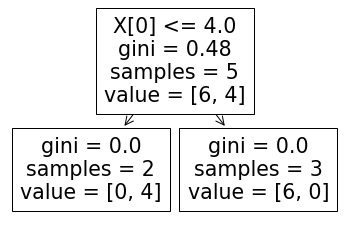

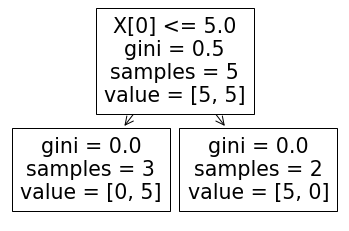

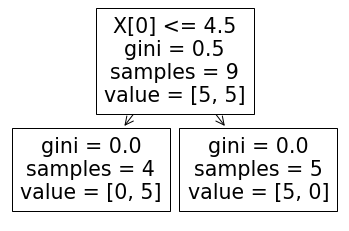

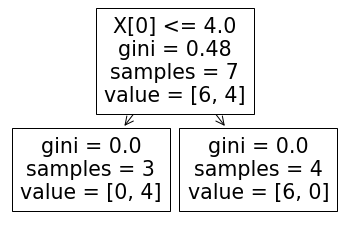

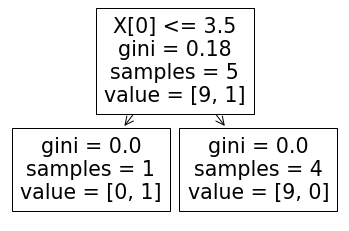

In [4]:
for t in rf.estimators_:
    plt.figure()
    tree.plot_tree(t)

In [57]:
rf.predict([x[0]])

array([1])

In [45]:
for p in rf.decision_path([x[0]]):
    print(p)
# from scipy.sparse import csr_matrix
# print(rf.decision_path([x[0]]))

(node_indicator, _) = rf.decision_path([x[0]])

  (0, 0)	1
  (0, 1)	1
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 7)	1
  (0, 9)	1
  (0, 10)	1
  (0, 12)	1
  (0, 13)	1
[ 0  3  6  9 12 15]


array([ 0,  3,  6,  9, 12, 15], dtype=int32)

In [7]:
x.shape

(10, 1)

In [76]:
indicators, index_by_tree = rf.decision_path([x[1]])
indices = zip(index_by_tree, index_by_tree[1:])
# for tree_classifier, (begin, end) in zip(rf.estimators_, indices):
#     t = tree_classifier.tree_
#     node_indices = indicators[0, begin:end].indices
#     print(t)
#     print(node_indices)
# print(indicators[0])
# for (a, b) in indices:
#     print(a, b)
#     print(indicators[:, a:b])
# list(indices)

# print(list(indices))
# print(indicators[0, 2:4].indices)
print(index_by_tree)

[ 0  3  6  9 12 15]


In [78]:
indicators.shape

(1, 15)

In [98]:
csr = rf.estimators_[0].decision_path([x[7]])
for a in csr:
    print(a)

  (0, 0)	1
  (0, 2)	1


In [97]:
csr.shape
for i in range(csr.shape[0]):
    for j in range(csr.shape[1]):
        print(csr[i, j], end=" ")
    print()

1 0 1 


In [91]:
csr[2,2]

0

In [111]:
leaves = rf.apply(x[0:1])
print(leaves.shape)
for i in range(len(leaves)):
    print(i, leaves[i])

(1, 5)
0 [1 1 1 1 1]


In [109]:
for xs, ys in zip(x, preds):
    print(xs, ys)

[0] 1
[1] 1
[2] 1
[3] 1
[4] 1
[5] 0
[6] 0
[7] 0
[8] 0
[9] 0
